# Tâche 9

## Import des données

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
import numpy as np
import matplotlib.pyplot as plt
with MPRester("JHBtSyD6TnKgmAas") as m:
    ph_struct = m.get_phonon_bandstructure_by_material_id("mp-5077")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



## Visualisation de la structure de bandes photoniques

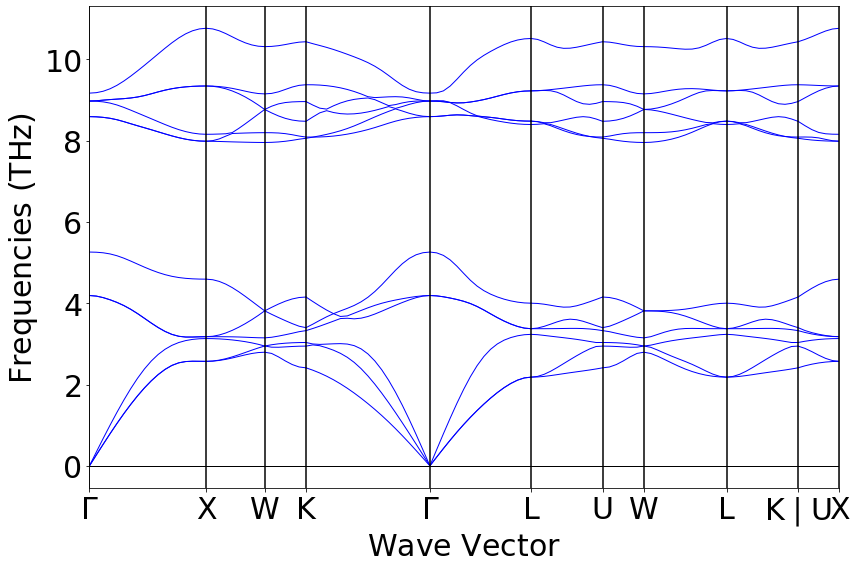

In [2]:
plot = PhononBSPlotter(ph_struct)
plot.show()

## Calcul de la vitesse du son dans différentes directions du matériau
Analysons les différentes vitesses du son dans les directions $\Gamma$-X, $\Gamma$-K et $\Gamma$-L. Physiquement, la vitesse du son est obtenue par l'expression $v_s = \frac{d\omega}{dq}$ qui représente la pente d'une branche acoustique comme représentée ci-dessus multipliée par $2\pi$ (car $\omega = 2 \pi f$). Nous calculons donc la pente à l'origine de la fréquence en fonction de q (sans oublier de multiplier par 100 car nous passons de THz.Å à m/s)

In [3]:
freq = plot.bs_plot_data()['frequency']
dist = plot.bs_plot_data()['distances']
speed_gamma_x = 2*np.pi*abs(freq[0][2][len(freq[0][2])//2]-freq[0][2][0])/abs(dist[0][len(freq[0][2])//2]-dist[0][0])*100
speed_gamma_k = 2*np.pi*abs(freq[3][1][len(freq[3][1])//2]-freq[3][1][-1])/abs(dist[3][len(freq[3][1])//2]-dist[3][-1])*100
speed_gamma_l = 2*np.pi*abs(freq[4][0][len(freq[4][0])//2]-freq[4][0][0])/abs(dist[4][len(freq[4][0])//2]-dist[4][0])*100
print("Représentée en vert ci-dessous, la vitesse du son dans la 3e branche dans la direction Gamma-X : {0:.4f} m/s".format(speed_gamma_x))
print("Représentée en magenta ci-dessous, la vitesse du son dans la 2e branche dans la direction Gamma-K : {0:.4f} m/s".format(speed_gamma_k))
print("Représentée en rouge ci-dessous, la vitesse du son dans la 1ere branche dans la direction Gamma-L : {0:.4f} m/s".format(speed_gamma_l))

Représentée en vert ci-dessous, la vitesse du son dans la 3e branche dans la direction Gamma-X : 3297.8000 m/s
Représentée en magenta ci-dessous, la vitesse du son dans la 2e branche dans la direction Gamma-K : 2823.0259 m/s
Représentée en rouge ci-dessous, la vitesse du son dans la 1ere branche dans la direction Gamma-L : 2225.6666 m/s


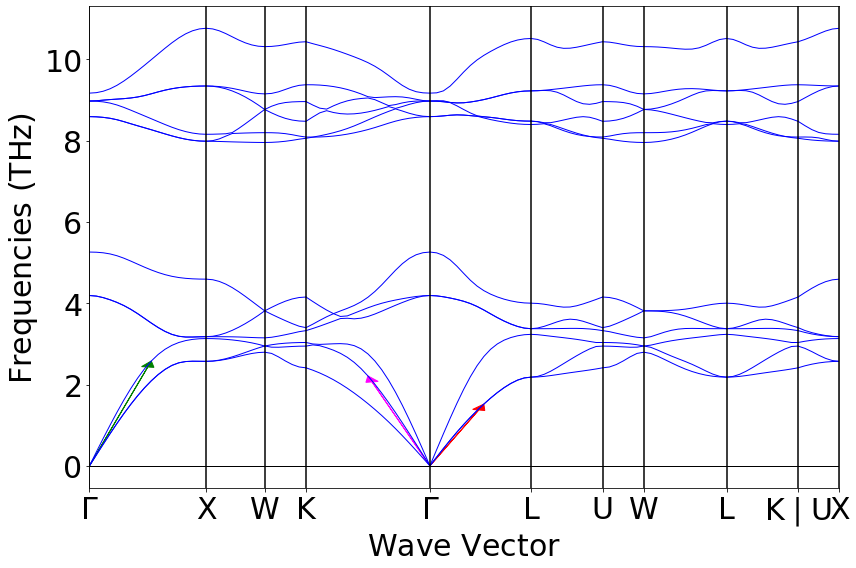

In [4]:
plot.get_plot()
plt.arrow(dist[0][0], freq[0][2][0], dist[0][len(freq[0][2])//2]-dist[0][0], freq[0][2][len(freq[0][2])//2]-freq[0][2][0],head_width=0.1,length_includes_head=True, color='green')
plt.arrow(dist[3][-1], freq[3][1][-1], dist[3][len(freq[3][1])//2]-dist[3][-1], freq[3][1][len(freq[3][1])//2]-freq[3][1][-1],head_width=0.1,length_includes_head=True, color='magenta')
plt.arrow(dist[4][0], freq[4][0][0], dist[4][len(freq[4][0])//2]-dist[4][0], freq[4][0][len(freq[4][0])//2]-freq[4][0][0],head_width=0.1,length_includes_head=True, color='red')
plt.show()